In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [2]:
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [3]:
# Preprocess all train images
train_generator = train_data_gen.flow_from_directory(
        './datasets/train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28821 images belonging to 7 classes.


In [4]:
# Preprocess all test images
validation_generator = validation_data_gen.flow_from_directory(
        './datasets/validation',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 7066 images belonging to 7 classes.


In [5]:
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Input
from tensorflow.keras.optimizers import Adam

# Create model structure
emotion_model = Sequential()

# Define input layer
emotion_model.add(Input(shape=(48, 48, 1)))

# Add convolutional layers, pooling layers, and dropout layers
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

cv2.ocl.setUseOpenCL(False)

# Compile the model
emotion_model.compile(loss='categorical_crossentropy', 
                      optimizer=Adam(learning_rate=0.001), 
                      metrics=['accuracy'])


In [6]:
import math

# Calculate steps per epoch and validation steps
steps_per_epoch = math.ceil(28709 / 64)
validation_steps = math.ceil(7178 / 64)

# Train the model
emotion_model_info = emotion_model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_steps
)


Epoch 1/50


/Users/bob/anaconda3/envs/Sch_dev/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 52s 114ms/step - accuracy: 0.2441 - loss: 1.8203 - val_accuracy: 0.3755 - val_loss: 1.6192
Epoch 2/50
  1/449 ━━━━━━━━━━━━━━━━━━━━ 55s 123ms/step - accuracy: 0.2500 - loss: 1.7764

2024-06-11 18:28:43.573763: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/bob/anaconda3/envs/Sch_dev/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


  2/449 ━━━━━━━━━━━━━━━━━━━━ 49s 111ms/step - accuracy: 0.2734 - loss: 1.7453

2024-06-11 18:28:43.820574: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.2968 - loss: 1.7144 - val_accuracy: 0.3721 - val_loss: 1.6119
Epoch 3/50


2024-06-11 18:28:47.162058: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 52s 115ms/step - accuracy: 0.3860 - loss: 1.5687 - val_accuracy: 0.4524 - val_loss: 1.3898
Epoch 4/50
  1/449 ━━━━━━━━━━━━━━━━━━━━ 57s 128ms/step - accuracy: 0.4844 - loss: 1.3646

2024-06-11 18:29:38.989741: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


  2/449 ━━━━━━━━━━━━━━━━━━━━ 51s 115ms/step - accuracy: 0.5156 - loss: 1.3344

2024-06-11 18:29:39.239121: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5467 - loss: 1.3042 - val_accuracy: 0.4588 - val_loss: 1.3750
Epoch 5/50


2024-06-11 18:29:42.562417: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 53s 117ms/step - accuracy: 0.4830 - loss: 1.3632 - val_accuracy: 0.5151 - val_loss: 1.2608
Epoch 6/50
  1/449 ━━━━━━━━━━━━━━━━━━━━ 1:00 136ms/step - accuracy: 0.4688 - loss: 1.3580

2024-06-11 18:30:35.114020: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


  2/449 ━━━━━━━━━━━━━━━━━━━━ 49s 111ms/step - accuracy: 0.4766 - loss: 1.3386 

2024-06-11 18:30:35.367806: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4843 - loss: 1.3192 - val_accuracy: 0.5134 - val_loss: 1.2592
Epoch 7/50


2024-06-11 18:30:38.561609: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 53s 117ms/step - accuracy: 0.5186 - loss: 1.2567 - val_accuracy: 0.5412 - val_loss: 1.2059
Epoch 8/50
  1/449 ━━━━━━━━━━━━━━━━━━━━ 53s 119ms/step - accuracy: 0.5625 - loss: 1.1635

2024-06-11 18:31:31.066554: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


  2/449 ━━━━━━━━━━━━━━━━━━━━ 50s 113ms/step - accuracy: 0.5391 - loss: 1.1914

2024-06-11 18:31:31.306089: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5157 - loss: 1.2191 - val_accuracy: 0.5381 - val_loss: 1.2094
Epoch 9/50


2024-06-11 18:31:34.660737: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 58s 128ms/step - accuracy: 0.5508 - loss: 1.1956 - val_accuracy: 0.5626 - val_loss: 1.1649
Epoch 10/50
  1/449 ━━━━━━━━━━━━━━━━━━━━ 1:11 159ms/step - accuracy: 0.5469 - loss: 1.1988

2024-06-11 18:32:32.238731: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


  2/449 ━━━━━━━━━━━━━━━━━━━━ 55s 125ms/step - accuracy: 0.5664 - loss: 1.1824 

2024-06-11 18:32:32.531070: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5859 - loss: 1.1660 - val_accuracy: 0.5626 - val_loss: 1.1630
Epoch 11/50


2024-06-11 18:32:35.964902: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 53s 118ms/step - accuracy: 0.5680 - loss: 1.1414 - val_accuracy: 0.5766 - val_loss: 1.1270
Epoch 12/50
  1/449 ━━━━━━━━━━━━━━━━━━━━ 58s 131ms/step - accuracy: 0.5000 - loss: 1.2497

2024-06-11 18:33:29.086220: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


  2/449 ━━━━━━━━━━━━━━━━━━━━ 52s 118ms/step - accuracy: 0.4883 - loss: 1.2446

2024-06-11 18:33:29.342060: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4766 - loss: 1.2396 - val_accuracy: 0.5753 - val_loss: 1.1273
Epoch 13/50


2024-06-11 18:33:32.550463: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 53s 117ms/step - accuracy: 0.5842 - loss: 1.1019 - val_accuracy: 0.5753 - val_loss: 1.1113
Epoch 14/50
  1/449 ━━━━━━━━━━━━━━━━━━━━ 1:04 143ms/step - accuracy: 0.5000 - loss: 1.1492

2024-06-11 18:34:25.294235: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


  2/449 ━━━━━━━━━━━━━━━━━━━━ 49s 111ms/step - accuracy: 0.5312 - loss: 1.1432 

2024-06-11 18:34:25.554147: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5624 - loss: 1.1373 - val_accuracy: 0.5737 - val_loss: 1.1156
Epoch 15/50


2024-06-11 18:34:28.784792: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 54s 119ms/step - accuracy: 0.5970 - loss: 1.0709 - val_accuracy: 0.5800 - val_loss: 1.1147
Epoch 16/50
  1/449 ━━━━━━━━━━━━━━━━━━━━ 1:07 152ms/step - accuracy: 0.6406 - loss: 1.0390

2024-06-11 18:35:22.355006: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


  2/449 ━━━━━━━━━━━━━━━━━━━━ 59s 134ms/step - accuracy: 0.6445 - loss: 1.0206 

2024-06-11 18:35:22.647234: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6484 - loss: 1.0022 - val_accuracy: 0.5778 - val_loss: 1.1235
Epoch 17/50


2024-06-11 18:35:25.920306: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 52s 115ms/step - accuracy: 0.6106 - loss: 1.0279 - val_accuracy: 0.5934 - val_loss: 1.0842
Epoch 18/50
  1/449 ━━━━━━━━━━━━━━━━━━━━ 55s 123ms/step - accuracy: 0.5312 - loss: 1.2299

2024-06-11 18:36:17.899044: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


  2/449 ━━━━━━━━━━━━━━━━━━━━ 50s 114ms/step - accuracy: 0.5508 - loss: 1.1812

2024-06-11 18:36:18.142867: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5702 - loss: 1.1326 - val_accuracy: 0.5952 - val_loss: 1.0843
Epoch 19/50


2024-06-11 18:36:21.418258: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 53s 117ms/step - accuracy: 0.6236 - loss: 0.9968 - val_accuracy: 0.5965 - val_loss: 1.0911
Epoch 20/50
  1/449 ━━━━━━━━━━━━━━━━━━━━ 1:13 165ms/step - accuracy: 0.7031 - loss: 0.9389

2024-06-11 18:37:13.965478: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


  2/449 ━━━━━━━━━━━━━━━━━━━━ 54s 121ms/step - accuracy: 0.7109 - loss: 0.8961 

2024-06-11 18:37:14.259905: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7187 - loss: 0.8535 - val_accuracy: 0.5967 - val_loss: 1.0871
Epoch 21/50


2024-06-11 18:37:17.563054: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 52s 117ms/step - accuracy: 0.6408 - loss: 0.9538 - val_accuracy: 0.6010 - val_loss: 1.0917
Epoch 22/50
  1/449 ━━━━━━━━━━━━━━━━━━━━ 52s 118ms/step - accuracy: 0.6250 - loss: 0.9297

2024-06-11 18:38:09.996786: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


  2/449 ━━━━━━━━━━━━━━━━━━━━ 50s 113ms/step - accuracy: 0.6016 - loss: 0.9862

2024-06-11 18:38:10.234668: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5782 - loss: 1.0425 - val_accuracy: 0.6023 - val_loss: 1.0921
Epoch 23/50


2024-06-11 18:38:13.803215: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 52s 116ms/step - accuracy: 0.6484 - loss: 0.9366 - val_accuracy: 0.6016 - val_loss: 1.0873
Epoch 24/50
  1/449 ━━━━━━━━━━━━━━━━━━━━ 59s 132ms/step - accuracy: 0.6719 - loss: 1.1077

2024-06-11 18:39:06.198326: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


  2/449 ━━━━━━━━━━━━━━━━━━━━ 55s 125ms/step - accuracy: 0.6602 - loss: 1.0747

2024-06-11 18:39:06.462539: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6485 - loss: 1.0419 - val_accuracy: 0.6060 - val_loss: 1.0855
Epoch 25/50


2024-06-11 18:39:09.716998: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 52s 115ms/step - accuracy: 0.6631 - loss: 0.9000 - val_accuracy: 0.6132 - val_loss: 1.0706
Epoch 26/50
  1/449 ━━━━━━━━━━━━━━━━━━━━ 1:03 141ms/step - accuracy: 0.6250 - loss: 0.9276

2024-06-11 18:40:01.596624: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


  2/449 ━━━━━━━━━━━━━━━━━━━━ 50s 113ms/step - accuracy: 0.6367 - loss: 0.9027 

2024-06-11 18:40:01.857383: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6484 - loss: 0.8778 - val_accuracy: 0.6108 - val_loss: 1.0715
Epoch 27/50


2024-06-11 18:40:04.994729: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 52s 116ms/step - accuracy: 0.6774 - loss: 0.8630 - val_accuracy: 0.6054 - val_loss: 1.1087
Epoch 28/50
  1/449 ━━━━━━━━━━━━━━━━━━━━ 1:10 156ms/step - accuracy: 0.6250 - loss: 0.9538

2024-06-11 18:40:57.165130: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


  2/449 ━━━━━━━━━━━━━━━━━━━━ 54s 122ms/step - accuracy: 0.6641 - loss: 0.8893 

2024-06-11 18:40:57.449835: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7030 - loss: 0.8251 - val_accuracy: 0.6039 - val_loss: 1.1069
Epoch 29/50


2024-06-11 18:41:00.786727: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 52s 116ms/step - accuracy: 0.6911 - loss: 0.8322 - val_accuracy: 0.6057 - val_loss: 1.0908
Epoch 30/50
  1/449 ━━━━━━━━━━━━━━━━━━━━ 1:04 144ms/step - accuracy: 0.6875 - loss: 0.8836

2024-06-11 18:41:53.064026: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


  2/449 ━━━━━━━━━━━━━━━━━━━━ 50s 114ms/step - accuracy: 0.6797 - loss: 0.9106 

2024-06-11 18:41:53.329045: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6719 - loss: 0.9376 - val_accuracy: 0.6022 - val_loss: 1.0967
Epoch 31/50


2024-06-11 18:41:56.548221: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 52s 116ms/step - accuracy: 0.6944 - loss: 0.8162 - val_accuracy: 0.6152 - val_loss: 1.0997
Epoch 32/50
  1/449 ━━━━━━━━━━━━━━━━━━━━ 1:05 146ms/step - accuracy: 0.7188 - loss: 0.9337

2024-06-11 18:42:48.944140: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


  2/449 ━━━━━━━━━━━━━━━━━━━━ 52s 117ms/step - accuracy: 0.6875 - loss: 0.9506 

2024-06-11 18:42:49.213795: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6564 - loss: 0.9674 - val_accuracy: 0.6170 - val_loss: 1.0978
Epoch 33/50


2024-06-11 18:42:52.313419: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 52s 115ms/step - accuracy: 0.7124 - loss: 0.7744 - val_accuracy: 0.6145 - val_loss: 1.0945
Epoch 34/50
  1/449 ━━━━━━━━━━━━━━━━━━━━ 1:14 167ms/step - accuracy: 0.7344 - loss: 0.7626

2024-06-11 18:43:44.071835: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


  2/449 ━━━━━━━━━━━━━━━━━━━━ 1:07 151ms/step - accuracy: 0.7188 - loss: 0.7918

2024-06-11 18:43:44.396474: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7032 - loss: 0.8210 - val_accuracy: 0.6115 - val_loss: 1.0924
Epoch 35/50


2024-06-11 18:43:47.574637: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 53s 117ms/step - accuracy: 0.7115 - loss: 0.7691 - val_accuracy: 0.6057 - val_loss: 1.1057
Epoch 36/50
  1/449 ━━━━━━━━━━━━━━━━━━━━ 59s 133ms/step - accuracy: 0.7188 - loss: 0.8191

2024-06-11 18:44:40.279017: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


  2/449 ━━━━━━━━━━━━━━━━━━━━ 47s 107ms/step - accuracy: 0.7227 - loss: 0.8115

2024-06-11 18:44:40.526377: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7265 - loss: 0.8040 - val_accuracy: 0.6070 - val_loss: 1.1011
Epoch 37/50


2024-06-11 18:44:43.624446: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 52s 116ms/step - accuracy: 0.7262 - loss: 0.7356 - val_accuracy: 0.6124 - val_loss: 1.1016
Epoch 38/50
  1/449 ━━━━━━━━━━━━━━━━━━━━ 1:07 151ms/step - accuracy: 0.7344 - loss: 0.6934

2024-06-11 18:45:35.657158: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


  2/449 ━━━━━━━━━━━━━━━━━━━━ 55s 124ms/step - accuracy: 0.6953 - loss: 0.7768 

2024-06-11 18:45:35.938761: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6564 - loss: 0.8598 - val_accuracy: 0.6098 - val_loss: 1.1029
Epoch 39/50


2024-06-11 18:45:39.064401: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 52s 116ms/step - accuracy: 0.7347 - loss: 0.7183 - val_accuracy: 0.6175 - val_loss: 1.0994
Epoch 40/50
  1/449 ━━━━━━━━━━━━━━━━━━━━ 54s 122ms/step - accuracy: 0.7188 - loss: 0.9311

2024-06-11 18:46:31.158438: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


  2/449 ━━━━━━━━━━━━━━━━━━━━ 49s 111ms/step - accuracy: 0.6875 - loss: 0.9738

2024-06-11 18:46:31.399129: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6564 - loss: 1.0163 - val_accuracy: 0.6101 - val_loss: 1.1091
Epoch 41/50


2024-06-11 18:46:34.570509: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 52s 116ms/step - accuracy: 0.7415 - loss: 0.6968 - val_accuracy: 0.6141 - val_loss: 1.1150
Epoch 42/50
  1/449 ━━━━━━━━━━━━━━━━━━━━ 55s 123ms/step - accuracy: 0.7656 - loss: 0.5855

2024-06-11 18:47:26.569023: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


  2/449 ━━━━━━━━━━━━━━━━━━━━ 47s 106ms/step - accuracy: 0.7656 - loss: 0.6297

2024-06-11 18:47:26.805554: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7656 - loss: 0.6737 - val_accuracy: 0.6141 - val_loss: 1.1181
Epoch 43/50


2024-06-11 18:47:29.978321: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 53s 118ms/step - accuracy: 0.7499 - loss: 0.6694 - val_accuracy: 0.6159 - val_loss: 1.1326
Epoch 44/50
  1/449 ━━━━━━━━━━━━━━━━━━━━ 53s 120ms/step - accuracy: 0.7500 - loss: 0.7104

2024-06-11 18:48:23.112859: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


  2/449 ━━━━━━━━━━━━━━━━━━━━ 48s 109ms/step - accuracy: 0.7812 - loss: 0.6391

2024-06-11 18:48:23.348237: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8124 - loss: 0.5681 - val_accuracy: 0.6180 - val_loss: 1.1309
Epoch 45/50


2024-06-11 18:48:26.506756: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 53s 117ms/step - accuracy: 0.7508 - loss: 0.6739 - val_accuracy: 0.6175 - val_loss: 1.1211
Epoch 46/50
  1/449 ━━━━━━━━━━━━━━━━━━━━ 56s 127ms/step - accuracy: 0.7188 - loss: 0.7972

2024-06-11 18:49:19.322866: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


  2/449 ━━━━━━━━━━━━━━━━━━━━ 52s 118ms/step - accuracy: 0.7344 - loss: 0.7230

2024-06-11 18:49:19.576310: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7499 - loss: 0.6492 - val_accuracy: 0.6197 - val_loss: 1.1174
Epoch 47/50


2024-06-11 18:49:22.726276: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 52s 116ms/step - accuracy: 0.7626 - loss: 0.6533 - val_accuracy: 0.6118 - val_loss: 1.1372
Epoch 48/50
  1/449 ━━━━━━━━━━━━━━━━━━━━ 1:07 150ms/step - accuracy: 0.7188 - loss: 0.6250

2024-06-11 18:50:14.935366: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


  2/449 ━━━━━━━━━━━━━━━━━━━━ 53s 120ms/step - accuracy: 0.7227 - loss: 0.6739 

2024-06-11 18:50:15.212585: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7265 - loss: 0.7225 - val_accuracy: 0.6163 - val_loss: 1.1361
Epoch 49/50


2024-06-11 18:50:18.366647: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 53s 117ms/step - accuracy: 0.7686 - loss: 0.6295 - val_accuracy: 0.6207 - val_loss: 1.1237
Epoch 50/50
  1/449 ━━━━━━━━━━━━━━━━━━━━ 1:20 180ms/step - accuracy: 0.7188 - loss: 0.6678

2024-06-11 18:51:11.223987: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


  2/449 ━━━━━━━━━━━━━━━━━━━━ 51s 116ms/step - accuracy: 0.7383 - loss: 0.6532 

2024-06-11 18:51:11.526856: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7577 - loss: 0.6387 - val_accuracy: 0.6192 - val_loss: 1.1286


2024-06-11 18:51:14.632195: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [7]:
model_json = emotion_model.to_json()
with open("high_accuracy_model.json",'w') as json_file:
    json_file.write(model_json)
emotion_model.save("high_accuracy_model.h5")

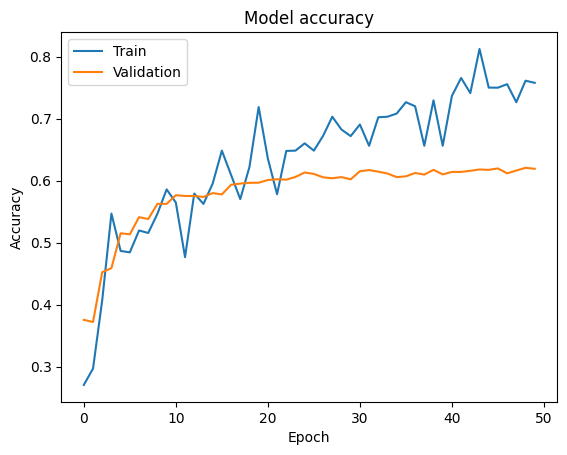

In [8]:
import matplotlib.pyplot as plt

plt.plot(emotion_model_info.history['accuracy'])
plt.plot(emotion_model_info.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [9]:
accuracy = emotion_model_info.history['accuracy']
print(accuracy)

[0.2705189287662506, 0.296875, 0.40727704763412476, 0.546875, 0.48659950494766235, 0.484375, 0.5196040868759155, 0.515625, 0.5466838479042053, 0.5859375, 0.5647022128105164, 0.4765625, 0.5792005062103271, 0.5625, 0.595162570476532, 0.6484375, 0.6092426776885986, 0.5703125, 0.622207522392273, 0.71875, 0.635625422000885, 0.578125, 0.6479629278182983, 0.6484375, 0.6601958870887756, 0.6484375, 0.6722545623779297, 0.703125, 0.6824312806129456, 0.671875, 0.6905516982078552, 0.65625, 0.7022618651390076, 0.703125, 0.708291232585907, 0.7265625, 0.7200362682342529, 0.65625, 0.729585587978363, 0.65625, 0.7367302179336548, 0.765625, 0.7412958145141602, 0.8125, 0.7500784397125244, 0.75, 0.7556198239326477, 0.7265625, 0.7612309455871582, 0.7578125]


In [10]:
# Evaluate the model on the validation data
batch_size = 64  # Define batch size
num_validation_samples = len(validation_generator.classes)  # Calculate total number of validation samples
steps = num_validation_samples // batch_size  # Calculate number of steps

loss, accuracy = emotion_model.evaluate(validation_generator, steps=steps)
print("Validation Accuracy: {:.2f}%".format(accuracy * 100))


110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6176 - loss: 1.1225
Validation Accuracy: 61.95%
